# Project 2: Evolutionary Tree Analysis

Whenever there is a outbreak due to a new virus, scientists and researchers must determine where the virus came from, when it appeared, and how it was transmitted. To do this, they use evolutionary trees, or phylogenies. For this week's project, I wanted to construct phylogenies to answer the following questions: **What is the variation in the most uncommon sequences in the most affected countries?**

To start, I will use the sequence data attained from virulign (that was provided in position_table.csv) and the [yaml file](https://www.ncbi.nlm.nih.gov/core/assets/genbank/files/ncov-sequences.yaml) that is used to generate the genome data (found on NCBI through the Galaxy Project website in their *Variation* section.

## Import data
#### YAML Data (contains collection date and locality information)

In [250]:
import wget
import yaml
import numpy as np

# Get file
yamlURL = 'https://www.ncbi.nlm.nih.gov/core/assets/genbank/files/ncov-sequences.yaml'
file = 'ncov-sequences.yaml'
wget.download(yamlURL, file)

# Read in YAML file
with open(file, 'r') as stream:
    accession_data = yaml.safe_load(stream)

## Read sequences into a table

The sequence data in the CSV file was attained using the Virulign software.

In [251]:
import pandas as pd
position_table = pd.read_csv('../../data/position_table.csv') # or put in the path to csc-448-project/data/position_table.csv

In [252]:
results = position_table.describe()
results

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
count,677,677,677,677,677,677,677,677,677,677,...,677,677,677,677,677,677,677,677,677,677
unique,677,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,MT262916.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
freq,1,677,677,677,677,677,677,677,677,677,...,677,677,677,677,677,677,677,677,677,677


There are 677 unique sequences in total.

In [253]:
position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
0,MT007544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
1,MT019529.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
2,MT019530.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
3,MT019531.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
4,MT019532.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,MT334544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
673,MT334546.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
674,MT334547.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
675,MT334557.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A


## Adding date and locality information to our sequence data table

Now we will add extra information about every sequence provided by the accession data.

First, we will put the data we want in dictionaries with the sequence ID as the key:

In [254]:
position_table['id'] = position_table['seqid'].str.slice(stop=-2)

acc = accession_data['genbank-sequences']
countries = {}
states = {}
dates = {}
for entry in acc:
    state = None
    curId = entry['accession']
    country = entry['locality']['country']
    if len(entry['locality']) > 1:
        state = entry['locality']['state']
    date = entry['collection-date']
    countries[curId] = country
    states[curId] = state or None
    dates[curId] = date

Next, we will write functions to return the correct values from each dictionary, so we can put these values in our data table.

In [255]:
def get_country(id):
    if id in countries.keys():
        return countries[id]
    else:
        return None

def get_state(id):
    if id in states.keys():
        return states[id]
    else:
        return None

def get_date(id):
    if id in dates.keys():
        return dates[id]
    else:
        return None

position_table['country'] = position_table['id'].apply(get_country)
position_table['state'] = position_table['id'].apply(get_state)
position_table['date'] = position_table['id'].apply(get_date)
position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3,id,country,state,date
0,MT007544.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT007544,Australia,Victoria,2020-01-25
1,MT019529.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT019529,China,"Hubei, Wuhan",2019-12-23
2,MT019530.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT019530,China,"Hubei, Wuhan",2019-12-30
3,MT019531.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT019531,China,"Hubei, Wuhan",2019-12-30
4,MT019532.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT019532,China,"Hubei, Wuhan",2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,MT334544.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT334544,USA,UT,2020-03-19
673,MT334546.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT334546,USA,UT,2020-03-19
674,MT334547.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT334547,USA,UT,2020-03-19
675,MT334557.1,A,T,G,T,T,T,G,T,T,...,T,A,C,A,C,A,MT334557,USA,UT,2020-03-20


The extra fields (id, country, state, and date) can now be seen at the far right of our data table as new columns.

## Constructing our first phylogenetic tree

Now, it is time to construct our first phylogenetic tree using the BioPython library. Before looking at individual countries, I will be creating a phylogenetic tree to see the variation from the consensus sequence. The first step is to construct a distance matrix for the BioPython library. We will do this with the 10 sequences that vary the most from the consensus sequence.

First we attain the consensus sequence.

In [256]:
concensus_seq = position_table.drop('seqid',axis=1).mode(axis=0).T[0]

# Other countries (for later)
us_position_table = position_table[position_table['country'] == "USA"]
spain_position_table = position_table[position_table['country'] == "Spain"]
italy_position_table = position_table[position_table['country'] == "Italy"]

# USA
concensus_seq_us = us_position_table.drop('seqid',axis=1).mode(axis=0).T[0]

# Spain
concensus_seq_spain = spain_position_table.drop('seqid',axis=1).mode(axis=0).T[0]

# Italy
concensus_seq_italy = italy_position_table.drop('seqid',axis=1).mode(axis=0).T[0]
concensus_seq_italy


S_1_1                A
S_1_2                T
S_1_3                G
S_2_1                T
S_2_2                T
               ...    
S_1273_3             A
id            MT066156
country          Italy
state              NaN
date        2020-01-30
Name: 0, Length: 3823, dtype: object

In [257]:
position_table = position_table.set_index('seqid')
us_position_table = us_position_table.set_index('seqid')
spain_position_table = spain_position_table.set_index('seqid')
italy_position_table = italy_position_table.set_index('seqid')

Now, we will compute the sequences with the most mismatches from the most common sequence. These mismatches provide us with a distance metric that we can use to see how different 2 sequences are from each other. We will sort the results and take the top 10 most uncommon sequences for our analysis.

In [258]:
distance_from_concensus_seq = position_table.apply(lambda row: sum(row != concensus_seq),axis=1)
distance_from_concensus_seq_sorted = distance_from_concensus_seq.sort_values(ascending=False)
distance_from_concensus_seq_sorted

seqid
MT233522.1    86
MT308696.1    75
MT308694.1    57
MT263453.1    50
MT259284.1    35
              ..
MT262900.1     1
MT262901.1     1
MT262902.1     1
MT262903.1     1
MT263396.1     1
Length: 677, dtype: int64

In [259]:
# top 10 most uncommon sequences from our data
subset_seqs = distance_from_concensus_seq_sorted[:10].index
subset_seqs

Index(['MT233522.1', 'MT308696.1', 'MT308694.1', 'MT263453.1', 'MT259284.1',
       'MT293180.1', 'MT326129.1', 'MT259277.1', 'MT263431.1', 'MT263436.1'],
      dtype='object', name='seqid')

Now that we have our subset of uncommon sequences, we can construct a distance matrix for BioPython.

In [260]:
# Distance Matrix

def get_distance_matrix(subset_seqs, position_table):
    distances = {}
    for i in range(len(subset_seqs)):
        s1 = subset_seqs[i]
        for j in range(i+1, len(subset_seqs)):
            s2 = subset_seqs[j]
            distances[s1, s2] = sum(position_table.loc[s1] != position_table.loc[s2])
            distances[s2, s1] = distances[s1, s2]
    distances = pd.Series(distances).unstack()
    return distances  

distances = get_distance_matrix(subset_seqs, position_table)

# Using Biopython
def get_biopython_matrix(distances):
    matrix = np.tril(distances.values).tolist()
    for i in range(len(matrix)):
        matrix[i] = matrix[i][:i+1]
    d_matrix = DistanceMatrix(list(distances.index), matrix)
    return d_matrix

d_matrix = get_biopython_matrix(distances)
    

## Neighbor Joining Tree Method (from Biopython)

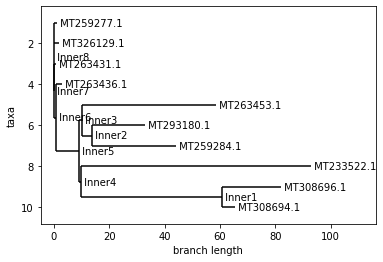

In [261]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

dt_constructor = DistanceTreeConstructor()

nj_tree = dt_constructor.nj(d_matrix)

%matplotlib inline

nj_tree.ladderize()
Phylo.draw(nj_tree)

## UPGMA Tree Method (from Biopython)

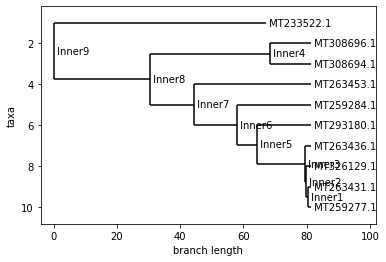

In [262]:
dt_constructor = DistanceTreeConstructor()

upgma_tree = dt_constructor.upgma(d_matrix)

%matplotlib inline

upgma_tree.ladderize()
Phylo.draw(upgma_tree)

## Back to our focus: Variation within the most affected countries

Cool! So we know how to construct distance matrices and use Biopython (a little bit). Let's now take a look at the phylogenies of different countries!

For this analysis, I will be constructing phylogenies for the three countries with the most total confirmed cases, as of April 20, 2020. These countries, in order, are the US, Spain, and Italy, with totals of 786,638, 200,210, and 181,228, respectively (https://coronavirus.jhu.edu/map.html).

### USA Phylogeny

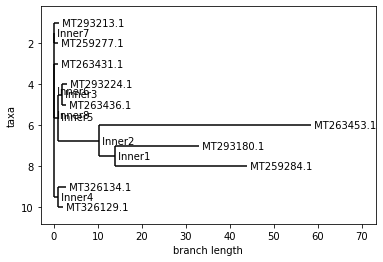

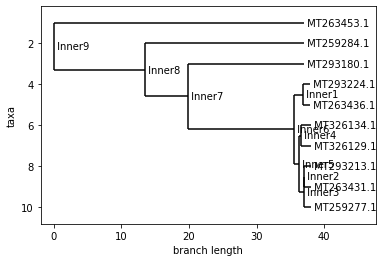

In [263]:
# USA
distance_from_concensus_seq_us = us_position_table.apply(lambda row: sum(row != concensus_seq_us),axis=1)
distance_from_concensus_seq_sorted_us = distance_from_concensus_seq_us.sort_values(ascending=False)

# top 10 most uncommon sequences from our data
subset_seqs_us = distance_from_concensus_seq_sorted_us[:10].index

# Get distance matrix
distances_us = get_distance_matrix(subset_seqs_us, us_position_table)
us_matrix = get_biopython_matrix(distances_us)

# Neighbor Joining Method
dt_constructor = DistanceTreeConstructor()
nj_tree_us = dt_constructor.nj(us_matrix)
%matplotlib inline
nj_tree.ladderize()
Phylo.draw(nj_tree_us)

# UPGMA Method
dt_constructor = DistanceTreeConstructor()
upgma_tree_us = dt_constructor.upgma(us_matrix)
%matplotlib inline
upgma_tree.ladderize()
Phylo.draw(upgma_tree_us)

### Spain Phylogeny

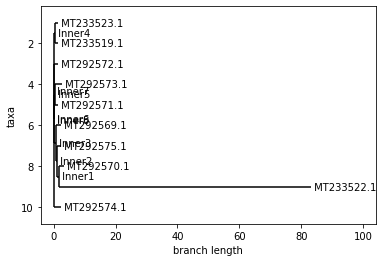

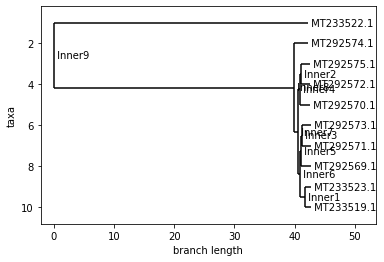

In [264]:
# Spain
distance_from_concensus_seq_spain = spain_position_table.apply(lambda row: sum(row != concensus_seq_spain),axis=1)
distance_from_concensus_seq_sorted_spain = distance_from_concensus_seq_spain.sort_values(ascending=False)

# top 10 most uncommon sequences from our data
subset_seqs_spain = distance_from_concensus_seq_sorted_spain[:10].index

# Get distance matrix
distances_spain = get_distance_matrix(subset_seqs_spain, spain_position_table)
spain_matrix = get_biopython_matrix(distances_spain)

# Neighbor Joining Method
dt_constructor = DistanceTreeConstructor()
nj_tree_spain = dt_constructor.nj(spain_matrix)
%matplotlib inline
nj_tree.ladderize()
Phylo.draw(nj_tree_spain)

# UPGMA Method
dt_constructor = DistanceTreeConstructor()
upgma_tree_spain = dt_constructor.upgma(spain_matrix)
%matplotlib inline
upgma_tree.ladderize()
Phylo.draw(upgma_tree_spain)

### Italy Phylogeny

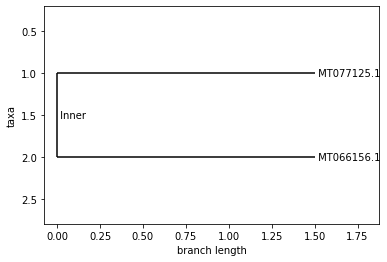

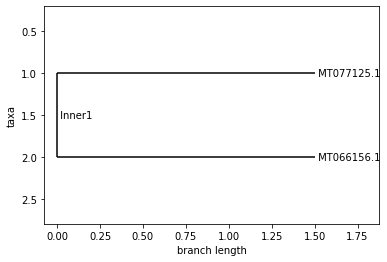

In [265]:
# Italy
distance_from_concensus_seq_italy = italy_position_table.apply(lambda row: sum(row != concensus_seq_italy),axis=1)
distance_from_concensus_seq_sorted_italy = distance_from_concensus_seq_italy.sort_values(ascending=False)

# top 10 most uncommon sequences from our data
subset_seqs_italy = distance_from_concensus_seq_sorted_italy[:10].index

# Get distance matrix
distances_italy = get_distance_matrix(subset_seqs_italy, italy_position_table)
italy_matrix = get_biopython_matrix(distances_italy)

# Neighbor Joining Method
dt_constructor = DistanceTreeConstructor()
nj_tree_italy = dt_constructor.nj(italy_matrix)
%matplotlib inline
nj_tree.ladderize()
Phylo.draw(nj_tree_italy)

# UPGMA Method
dt_constructor = DistanceTreeConstructor()
upgma_tree_italy = dt_constructor.upgma(italy_matrix)
%matplotlib inline
upgma_tree.ladderize()
Phylo.draw(upgma_tree_italy)

## Conclusion

After plotting the phylogenies for the different countries, it is easy to notice the difference in variation when compared to the original global phylogeny we plotted. When looking at the trees constructed by the Neighbor Joining algorithm, the USA looks pretty similar to the global tree, with a little bit less variation. What is interesting is Spain's phylogeny generated by the NJ algorithm. Most of its branches are close together except for the MT233522 sequence, which is very different from the other Spain sequences. These same relationships can be seen in the UPGMA trees. Notably, the Italy phylogeny had a tree which consisted of 2 branches of of the same length for both the NJ method and the UPGMA method. This happened because Italy only has two sequences in the dataset. This could be an error in my data retrieval, but if it's not, it is interesting to see that Italy only has two reported COVID-19 sequences.

In [266]:
position_table[position_table['country'] == 'Italy']

,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,S_4_1,...,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3,id,country,state,date
seqid,,,,,,,,,,,,,,,,,,,,,
MT066156.1,A,T,G,T,T,T,G,T,T,T,...,T,A,C,A,C,A,MT066156,Italy,None,2020-01-30
MT077125.1,A,T,G,T,T,T,G,T,T,T,...,T,A,C,A,C,A,MT077125,Italy,None,2020-01-31
